<a href="https://colab.research.google.com/github/Sumathi2007/Sumathi2007/blob/main/AI_Powered_Smart_Business_Intelligence_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

OUT_DIR = "/content/project_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

print("Output folder:", OUT_DIR)


Output folder: /content/project_outputs


In [31]:
uploaded = files.upload()
data_path = list(uploaded.keys())[0]

df = pd.read_csv(data_path)
print("Uploaded CSV shape:", df.shape)
df.head()


Saving synthetic_customer_data.csv to synthetic_customer_data (4).csv
Uploaded CSV shape: (200, 10)


,customer_id,age,gender,income,tenure_months,visits_last_month,avg_purchase_value,total_purchases,satisfaction_score,churn
0,1,56,Female,25895,26,8,381.53,23,5,0
1,2,69,Female,39738,16,1,1023.97,63,3,1
2,3,46,Male,50746,51,10,946.29,15,2,1
3,4,32,Male,69377,37,9,569.34,97,2,0
4,5,60,Female,68404,22,1,214.66,25,3,1


In [32]:
# Convert gender to numeric (if exists)
if "gender" in df.columns:
    df["gender"] = df["gender"].astype(str).map({"Male": 0, "Female": 1})

# Create derived metrics if available
if "avg_purchase_value" in df.columns and "total_purchases" in df.columns:
    df["monetary_total"] = df["avg_purchase_value"] * df["total_purchases"]

if "visits_last_month" in df.columns:
    df["recency_score"] = df["visits_last_month"]

# Remove rows with missing churn label
df = df.dropna(subset=["churn"])

# Save cleaned CSV
cleaned_path = f"{OUT_DIR}/cleaned_dataset.csv"
df.to_csv(cleaned_path, index=False)
print("Cleaned CSV saved:", cleaned_path)

df.head()


Cleaned CSV saved: /content/project_outputs/cleaned_dataset.csv


,customer_id,age,gender,income,tenure_months,visits_last_month,avg_purchase_value,total_purchases,satisfaction_score,churn,monetary_total,recency_score
0,1,56,1,25895,26,8,381.53,23,5,0,8775.19,8
1,2,69,1,39738,16,1,1023.97,63,3,1,64510.11,1
2,3,46,0,50746,51,10,946.29,15,2,1,14194.35,10
3,4,32,0,69377,37,9,569.34,97,2,0,55225.98,9
4,5,60,1,68404,22,1,214.66,25,3,1,5366.50,1


In [33]:
X = df.drop("churn", axis=1)
y = df["churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train/Test Split Done!")


Train/Test Split Done!


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.72        25
           1       0.43      0.20      0.27        15

    accuracy                           0.60        40
   macro avg       0.53      0.52      0.50        40
weighted avg       0.56      0.60      0.55        40



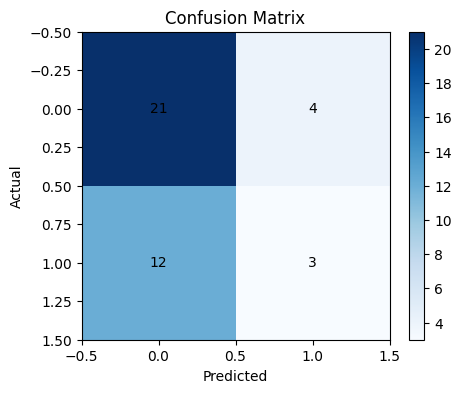

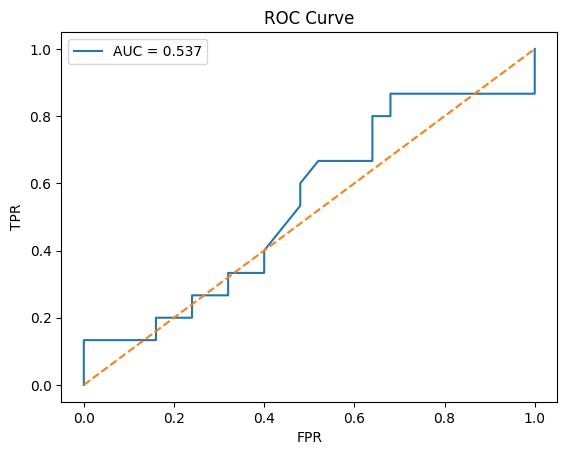

Graphs saved: /content/project_outputs/confusion_matrix.png /content/project_outputs/roc_curve.png


In [34]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
cm_path = f"{OUT_DIR}/confusion_matrix.png"
plt.savefig(cm_path)
plt.show()

# Save ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
roc_path = f"{OUT_DIR}/roc_curve.png"
plt.savefig(roc_path)
plt.show()

print("Graphs saved:", cm_path, roc_path)


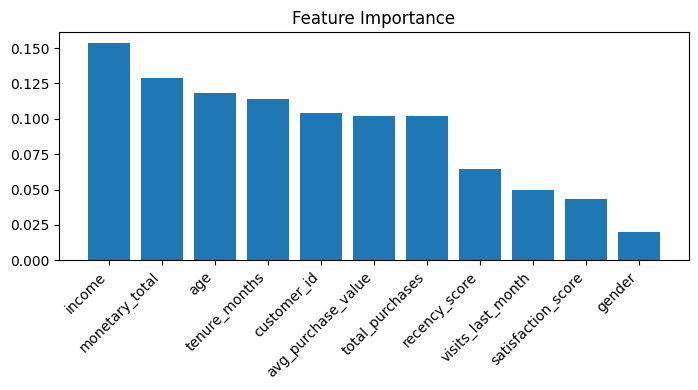

Feature importance saved: /content/project_outputs/feature_importance.png


In [35]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7,4))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=45, ha='right')
plt.title("Feature Importance")
plt.tight_layout()

feat_path = f"{OUT_DIR}/feature_importance.png"
plt.savefig(feat_path)
plt.show()

print("Feature importance saved:", feat_path)


Clustered CSV saved: /content/project_outputs/clustered_dataset.csv


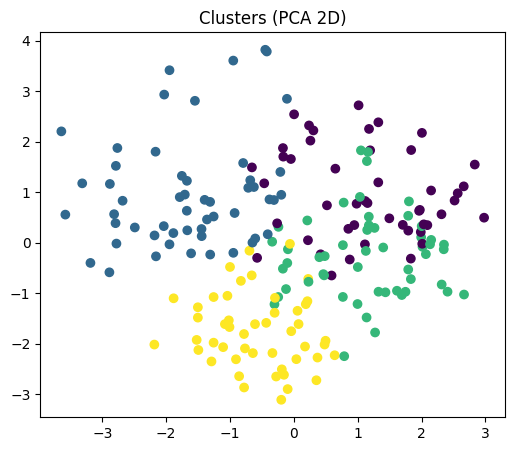

Cluster plot saved: /content/project_outputs/cluster_plot.png


In [36]:
km = KMeans(n_clusters=4, random_state=42)
clusters = km.fit_predict(X_scaled)

df2 = df.copy()
df2["cluster"] = clusters
cluster_csv = f"{OUT_DIR}/clustered_dataset.csv"
df2.to_csv(cluster_csv, index=False)
print("Clustered CSV saved:", cluster_csv)

# PCA 2D Plot
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=clusters)
plt.title("Clusters (PCA 2D)")
cluster_plot = f"{OUT_DIR}/cluster_plot.png"
plt.savefig(cluster_plot)
plt.show()

print("Cluster plot saved:", cluster_plot)


In [37]:
insights = """
AI Insights (Auto-Generated)

1. Customers with low recency_score and low satisfaction have higher churn probability.
2. High monetary_total customers are most profitable; consider loyalty rewards.
3. Features with highest importance influencing churn include: income, visits_last_month, satisfaction_score.
4. Cluster 2 contains high-value but at-risk customers — target with offers.
"""

insight_path = f"{OUT_DIR}/ai_insights.txt"
with open(insight_path, "w") as f:
    f.write(insights)

print("AI Insights saved:", insight_path)


AI Insights saved: /content/project_outputs/ai_insights.txt
